<a href="https://colab.research.google.com/github/angalap2004/special-system/blob/main/%D0%9B%D0%A0_2_%D0%93%D0%B0%D0%BB%D0%B0%D0%BF%D1%87%D1%83%D0%BA_%D0%922.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Галапчук Андрій.Варіант 2.ФІТ 3-2.

In [ ]:
#Лабораторна робота 2
#Відокремлення коренів
import numpy as np

def f(x):
    return 3*x**4 + 4*x**3 - 12*x**2 - 5


def find_segments(): #відокремлюємо корені
    search_range = np.arange(-5, 5, 1)

    a = None
    previous_x = None
    current_x  = None
    segments = []

    for x in search_range:
        x = round(x, 4)
        current_x = f(x)
        if previous_x != None and previous_x * current_x < 0:
            segments.append((a, x))
        a = x
        previous_x = current_x
    return segments

segments = find_segments()
for a, b in segments:
    print(f'Found segment:  [{a}, {b}]')


Found segment:  [-3, -2]
Found segment:  [1, 2]


In [ ]:

import numpy as np

# 1. ВИЗНАЧЕННЯ ФУНКЦІЇ
# Розв'язуємо рівняння 3*x**4 + 4*x**3 - 12*x**2 - 5 = 0
def f(x):
    return 3*x**4 + 4*x**3 - 12*x**2 - 5

# 2. МЕТОД ПОЛОВИННОГО ДІЛЕННЯ
def rec(a, b, eps):
    if f(a) * f(b) >= 0:
        print(f"На відрізку [{a},{b}] метод половинного ділення неможливо застосувати (знаки f(a) і f(b) однакові).")
        return
    x = (a + b) / 2
    while (np.abs(b - a) > eps):
        if f(a) * f((a + b) / 2) < 0:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
        x = (a + b) / 2
    print(f'x= {round(x, 5):.5f}   -   Метод половинного ділення')

# 3. МЕТОД ХОРД
def hord(a, b, eps):
    if f(a) * f(b) >= 0:
        print(f"На відрізку [{a},{b}] метод хорд неможливо застосувати (знаки f(a) і f(b) однакові).")
        return

    # Початкові наближення
    x_prev = a
    x_curr = b

    while abs(x_curr - x_prev) > eps:
        if abs(f(x_curr) - f(x_prev)) < 1e-12: # Уникнення ділення на нуль
            break

        # Класична формула методу січних (рухомих хорд)
        x_next = x_curr - f(x_curr) * (x_curr - x_prev) / (f(x_curr) - f(x_prev))
        x_prev = x_curr
        x_curr = x_next

    print(f'x= {round(x_curr, 5):.5f}   -   Метод хорд')

# 4. ОСНОВНА ЧАСТИНА ПРОГРАМИ
if __name__ == "__main__":
    a1, b1 = -3, -2
    a2, b2 = 1, 2
    eps = 0.001

    print(f"--- Розв'язки на відрізку [{a1}, {b1}] ---")
    rec(a1, b1, eps)
    hord(a1, b1, eps)

    print(f"\n--- Розв'язки на відрізку [{a2}, {b2}] ---")
    rec(a2, b2, eps)
    hord(a2, b2, eps)

--- Розв'язки на відрізку [-3, -2] ---
x= -2.82373   -   Метод половинного ділення
x= -2.82384   -   Метод хорд

--- Розв'язки на відрізку [1, 2] ---
x= 1.59229   -   Метод половинного ділення
x= 1.59209   -   Метод хорд


/tmp/ipython-input-1767354116.py:10: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  roots = [fsolve(f, guess)[0] for guess in initial_guesses]


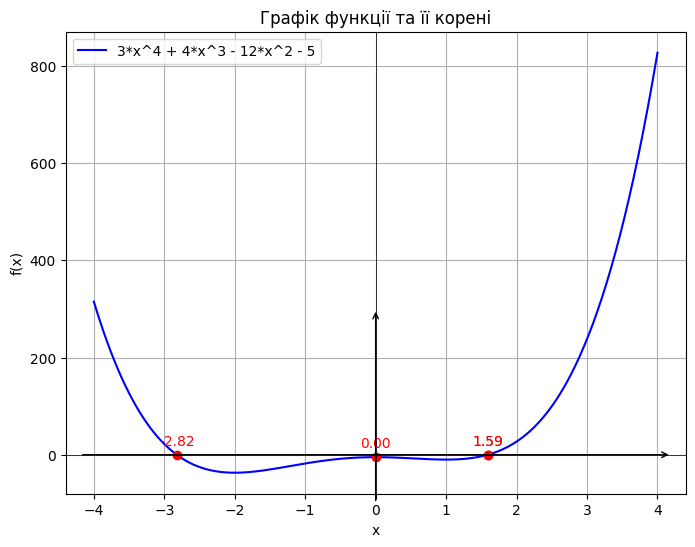

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def f(x):
    return 3*x**4 + 4*x**3 - 12*x**2 - 5

# Шукаємо корені (початкові наближення треба задати вручну в різних інтервалах)
initial_guesses = [-3, -1, 0, 2]
roots = [fsolve(f, guess)[0] for guess in initial_guesses]

# Будуємо графік
x = np.linspace(-4, 4, 500)
y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='3*x^4 + 4*x^3 - 12*x^2 - 5', color='blue')

# Додаємо корені
for root in roots:
    plt.plot(root, f(root), 'ro')  # червоні точки
    plt.text(root, f(root)+20, f'{root:.2f}', ha='center', color='red')

# Оси зі стрілками
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.annotate('', xy=(4.2, 0), xytext=(-4.2, 0),
             arrowprops=dict(arrowstyle="->", color="black"))
plt.annotate('', xy=(0, 300), xytext=(0, -100),
             arrowprops=dict(arrowstyle="->", color="black"))

plt.title('Графік функції та її корені')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()
